In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font",size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid",color_codes=True)

In [ ]:
### haremos una regresion lineal (marketing) siguiendo a susan lee

In [2]:
url = r"C:\Users\gonza\Downloads\Bank marketing campaigns dataset\bank-additional-full.csv"
data = pd.read_csv(url,sep=";")
data.dropna()
data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
data["education"] = np.where(data["education"] == "basic.9y","Basic",data["education"])
data["education"] = np.where(data["education"] == "basic.6y","Basic",data["education"])
data["education"] = np.where(data["education"] == "basic.4y","Basic",data["education"])


### EDA

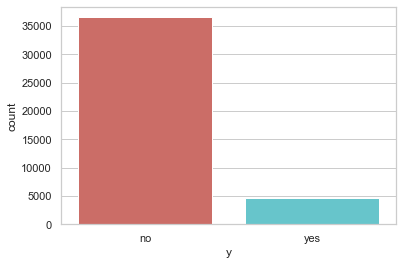

In [4]:
sns.countplot(x="y",data=data,palette="hls")
plt.show()

In [10]:
no = data["y"].value_counts()[0] / len(data) *100
si = data["y"].value_counts()[1] / len(data) *100
print(f"el porcentaje de no subcripcion es:{no}")
print(f"el porcentaje de subcripcion es:{si}")


el porcentaje de no subcripcion es:88.73458288821988
el porcentaje de subcripcion es:11.265417111780131


Our classes are imbalanced, and the ratio of no-subscription to subscription instances is 89:11. Before we go ahead to balance the classes, let’s do some more exploration.

In [11]:
data.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
yes,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [12]:
data.groupby("job").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
job,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086


In [13]:
data.groupby("education").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
education,,,,,,,,,,
Basic,42.163910,263.043874,2.559498,974.877967,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509


In [14]:
data.groupby("marital").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
marital,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313037,5157.393750


Text(0, 0.5, &#39;Frecuency of purchase&#39;)

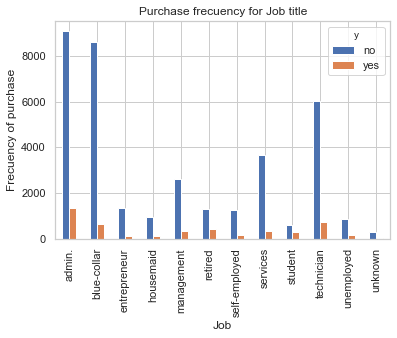

In [15]:
### visualizacion
%matplotlib inline
pd.crosstab(data.job,data.y).plot(kind="bar")
plt.title("Purchase frecuency for Job title")
plt.xlabel("Job")
plt.ylabel("Frecuency of purchase")

### pipeline

In [41]:
url = r"C:\Users\gonza\Downloads\BigMart Sales Data\Train.csv"
train_data = pd.read_csv(url)
#check for null values
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [42]:
# para la numerica usamos la media, y para la categorica la moda
train_data.Item_Weight.fillna(train_data.Item_Weight.mean(),inplace=True)
train_data.Outlet_Size.fillna(train_data.Outlet_Size.mode()[0],inplace=True)

Note that in this example I am not going to encode Item_Identifier since it will increase the number of feature to 1500. This feature  can be used in other ways (read here), but to keep the model simple, I will not use this feature here.

In [43]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [44]:
# Encode the categorical variables
columns = train_data.select_dtypes("object").columns.values.tolist()
columns_cate = [v for v in columns if v != "Item_Identifier" ]

In [45]:
columns

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [46]:
columns_cate

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [47]:
# create an object of the OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder(handle_unknown="ignore")
# encode the categorical variables
ce = OHE.fit_transform(train_data[columns_cate]).toarray()
ce

array([[0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [48]:
ce_df = pd.DataFrame(ce)

In [49]:
# merge con train_data
train_data = train_data.join(ce_df)
train_data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,31,32,33,34,35,36,37,38,39,40
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [50]:
# podemos quitar las columnas
train_data.drop(columns_cate,inplace=True,axis=1)

In [51]:
#Scale the data:
from sklearn.preprocessing import StandardScaler
# create an object of the standarscaler
scaler = StandardScaler()
# fit with the Item_MRP
scaler.fit(np.array(train_data["Item_MRP"]).reshape(-1,1))
# transforma the data
train_data["Item_MRP"] = scaler.transform(np.array(train_data["Item_MRP"]).reshape(-1,1))



In [54]:
# Model Building
# importing libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


train_X = train_data.drop(columns=['Item_Identifier','Item_Outlet_Sales'])
train_Y = train_data['Item_Outlet_Sales']

def modelos_aprueba(train_X,train_Y,model):
    train_x,test_x,train_y,test_y = train_test_split(train_X,train_Y,test_size=0.25,random_state=0)
    model = model
    model.fit(train_x,train_y)

    predict_train = model.predict(train_x)
    predict_test = model.predict(test_x)

    print("rmse on train data:",mean_squared_error(train_y,predict_train)**(0.5))
    print("rmse on test data:",mean_squared_error(test_y,predict_test)**(0.5))
    





In [55]:
model = LinearRegression()
modelos_aprueba(train_X,train_Y,model)

rmse on train data: 1120.4101706750557
rmse on test data: 1148.7127335923822


In [56]:
model = RandomForestRegressor(max_depth=10)
modelos_aprueba(train_X,train_Y,model)

rmse on train data: 919.3677792996241
rmse on test data: 1149.5161081689832


In [57]:
import statsmodels.api as sm
logic_model = sm.OLS(train_Y,train_X)
result = logic_model.fit() 
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     354.1
Date:                Fri, 09 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:28:18   Log-Likelihood:                -71987.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8491   BIC:                         1.443e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Item_Weight                  -0.5047      2.915     -0.173      0.863      -6.219       5.209
Item_Visibility            -304.9771    248.751     -1.226      0.220    -792.590     182.636
Item_MRP                    969.1662     12.313     78.712      0.000     945.030     993.302
Outlet_Establishment_Year     0.9906      0.028     35.785      0.000       0.936       1.045
0                           -30.4387     59.462     -0.512      0.609    -146.999      86.122
1                             1.0664     35.433      0.030      0.976     -68.391      70.524
2                            44.9182     37.396      1.201      0.230     -28.388     118.224
3                            47.4534     89.243      0.532      0.595    -127.484     222.390
4                           -60.0995     87.745     -0.685      0.493    -232.101     111.902
5                            -5.6932     45.306     -0.126      0.900     -94.504      83.118
6                            -1.7053     69.070     -0.025      0.980    -137.100     133.689
7                             1.4118    102.622      0.014      0.989    -199.753     202.577
8                            19.2880     45.163      0.427      0.669     -69.243     107.819
9                           -47.3320     44.157     -1.072      0.284    -133.890      39.226
10                          -33.2517     40.300     -0.825      0.409    -112.249      45.746
11                           24.3634     35.068      0.695      0.487     -44.379      93.105
12                           -7.2850     75.027     -0.097      0.923    -154.357     139.787
13                          -16.3844     50.526     -0.324      0.746    -115.428      82.659
14                          -44.8094     40.363     -1.110      0.267    -123.930      34.311
15                           -6.6215     54.667     -0.121      0.904    -113.783     100.540
16                          -26.6863     83.747     -0.319      0.750    -190.851     137.479
17                          178.2044    133.241      1.337      0.181     -82.981     439.390
18                          -17.1450     35.241     -0.487      0.627     -86.226      51.936
19                          -33.3906     53.348     -0.626      0.531    -137.966      71.185
20                           19.9366     88.754      0.225      0.822    -154.043     193.916
21                         -679.7387     25.981    -26.163      0.000    -730.669    -628.809
22                          -10.1472     12.952     -0.783      0.433     -35.535      15.241
23                           12.3194     29.078      0.424      0.672     -44.680      69.319
24                          -57.8517     16.069     -3.600      0.000     -89.352     -26.352
25                         -374.0718     23.453    -15.950      0.000    -4

In [58]:
# select features (we plot the 7 most important features)
train_x,test_x,train_y,test_y = train_test_split(train_X,train_Y,test_size=0.25,random_state=0)
model = RandomForestRegressor(max_depth=10)
model.fit(train_x,train_y)

predict_train = model.predict(train_x)
predict_test = model.predict(test_x)


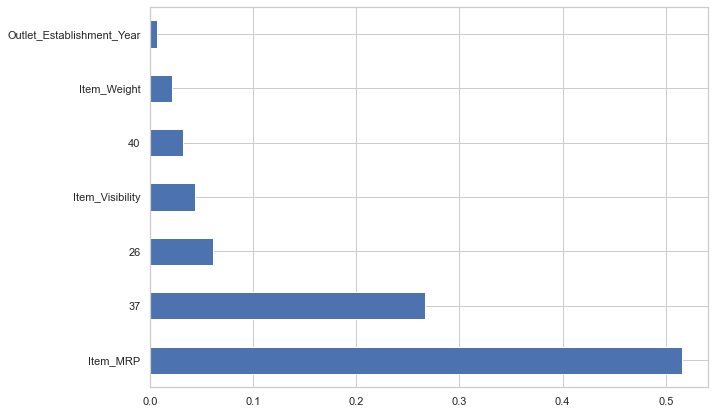

In [59]:
plt.figure(figsize=(10,7))
features = pd.Series(model.feature_importances_,index=train_x.columns)
features.nlargest(7).plot(kind="barh")

In [60]:
# ahora usamos el modelo pero con las features mas importantes
cols_features = list(features.sort_values(ascending=False).index[:7])


In [61]:
model = RandomForestRegressor(max_depth=10)
modelos_aprueba(train_X[cols_features],train_Y,model)

rmse on train data: 915.9289558814286
rmse on test data: 1138.8849330413746


Now, this is amazing! Using only 7 features has given almost the same performance as the previous model where we were using 45 features. Let us identify the final set of features that we need and the preprocessing steps for each of them.


### Color quantization — k-means clustering

In [2]:
from sklearn.utils import shuffle
from sklearn.datasets import load_sample_image
from sklearn.cluster import KMeans

Quickly, color quantization is technique to reduce the number of distinct colors used in an image. This is especially useful to compress images while keeping the integrity of the image.
Notice that we import a sample dataset called load_sample_image. This simply contains two images. We will use one of them to perform color quantization.
Now, for color quantization, different steps must be followed.
First, we need to change the image into a 2D matrix for manipulation:

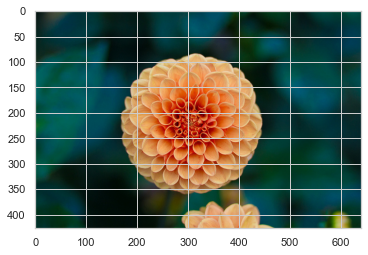

In [4]:
flower = load_sample_image("flower.jpg")
flower = np.array(flower,dtype=np.float64)/255
plt.imshow(flower)